# Домашняя работа
## Easy

Скачать данные отсюда (кнопка download all снизу):

[https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)

Это данные о пассажирах Титаника и информация о том, кто выжил, а кто нет. Будем анализировать файл train.csv.

Необходимо прочитать файл, посчитать процент детей (младше 18 лет), соотношение мужчин/женщин на борту

In [19]:
import pandas as pd

df_train = pd.read_csv(f'./Data/train.csv')

#Общее число пассажиров
total_pass_count = len(df_train)
#Общее число пассажиров, у которых определен возраст
total_pass_count_with_age = len(df_train.loc[~df_train['Age'].isnull()])

#Число детей
kids_count = len(df_train.loc[df_train['Age']<18])

#Процент детей к общему числу пассажиров
kids_percent_from_total = kids_count*100/total_pass_count

#Процент детей к числу пассажиров с известным возрастом
kids_percent_from_known_age = kids_count*100/total_pass_count_with_age

print(f'Процент детей к общему числу пассажиров: {kids_percent_from_total:.1f}%')
print(f'Процент детей к числу пассажиров с указанным возрастом: {kids_percent_from_known_age:.1f}%')

#Отношение мужчин и женщин
men_percent = len(df_train.loc[df_train['Sex']=='male'])*100/total_pass_count
women_percent = len(df_train.loc[df_train['Sex']=='female'])*100/total_pass_count
print(f'Процент женщин: {women_percent:.1f}%')
print(f'Процент мужчин: {men_percent:.1f}%')


Процент детей к общему числу пассажиров: 12.7%
Процент детей к числу пассажиров с указанным возрастом: 15.8%
Процент женщин: 35.2%
Процент мужчин: 64.8%


## Normal

Посчитать по скольким людям нет информации (пола или возраста)

Вывести гистограмму по возрасту пассажиров

Посчитать какой процент мужин и женщин выжили, какой процент детей выжили. 

Посчитать [корреляцию](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) между возрастом и выживаемостью, полом и выживаемостью

Количество людей без указания возраста или пола: 177
Процент выживших мужчин: 18.9
Процент выживших женщин: 74.2
Процент выживших детей: 54.0
               Age  Survived     Sex_b    Pclass      Fare
Age       1.000000 -0.077221  0.093254 -0.369226  0.096067
Survived -0.077221  1.000000 -0.543351 -0.338481  0.257307
Sex_b     0.093254 -0.543351  1.000000  0.131900 -0.182333
Pclass   -0.369226 -0.338481  0.131900  1.000000 -0.549500
Fare      0.096067  0.257307 -0.182333 -0.549500  1.000000


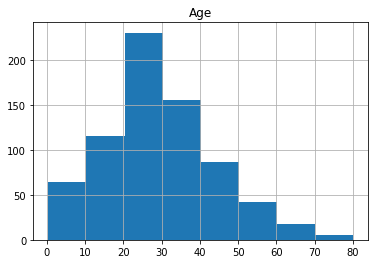

In [60]:
#Количество людей, по которым отсутствует какая либо информация (пол или возраст)
people_wout_data = len(df_train.loc[df_train['Age'].isnull() | df_train['Sex'].isnull()])
print(f'Количество людей без указания возраста или пола: {people_wout_data}')
import matplotlib.pyplot as plt
hist = df_train.hist(column = 'Age', bins=8)

#Процент выживших мужчин
men_surv_percent = len(df_train.loc[(df_train['Sex']=='male') & (df_train['Survived'].astype(int)==1)])*100/\
                    len(df_train.loc[df_train['Sex']=='male'])
#Процент выживших женщин
women_surv_percent = len(df_train.loc[(df_train['Sex']=='female') & (df_train['Survived'].astype(int)==1)])*100/\
                    len(df_train.loc[df_train['Sex']=='female'])
#Процент выживших детей
kids_surv_percent = len(df_train.loc[(df_train['Age']<18) & (df_train['Survived'].astype(int)==1)])*100/\
                    len(df_train.loc[df_train['Age']<18])                  


print(f'Процент выживших мужчин: {men_surv_percent:.1f}')
print(f'Процент выживших женщин: {women_surv_percent:.1f}')
print(f'Процент выживших детей: {kids_surv_percent:.1f}')

#Преобразование пола в числовое значение
def sex_binary(x):
    if x == 'male':
        return 1
    else:
        return 0

df_train['Sex_b'] = df_train['Sex'].apply(lambda x: sex_binary(x))

corr_train = df_train[['Age', 'Survived', 'Sex_b', 'Pclass', 'Fare']].corr()
#Матрица корреляций
print(corr_train)

## Hard

Сделав вывод по данным, написать простейшую модель, которая будет определять по входным данным, выжил ли человек. Проверить свою гипотезу на данных train.csv, оценить успешность модели. Прогнать модель на файле test.csv

Загрузить решение на kaggle.

Решение представляет из себя файл с 2 колонками: PassengerId и Survived. Id пассажиров и их данные нужно брать из файла test.csv.

## Решение: 
Исходя из матрицы корреляций можно сделать вывод о том, что существует только одна значимая корреляция - зависимость между полом и выживаемостью. Соответственно, самая простая модель состоит в том, чтобы определять вероятность выживания по полу.

In [64]:
df_answer = pd.read_csv(f'./Data/test.csv')

#Расчет выживаемости
def survived(x):
    if x == 'male':
        return 0
    else:
        return 1
    
df_answer['Survived'] = df_answer['Sex'].apply(lambda x: survived(x))
df_answer = df_answer[['PassengerId', 'Survived']]

print(df_answer)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
